<Axes: xlabel='ROK'>

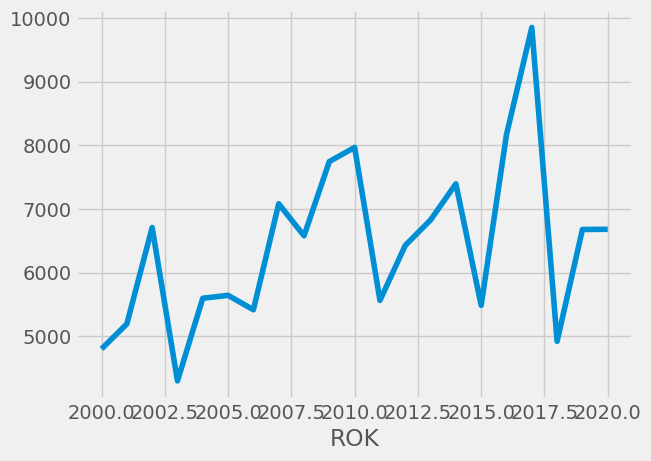

In [37]:
# 1. Uvod

import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Převeďte DATE na pd.datetime
2. Dopočítejte sloupec ROK
3. Agregujte data dle ROK, kdy počítáme sum z PRCP
4. Vizualizujte výsledek ve spojnicovém grafu
'''

df = pd.read_csv(url,sep=";")
df["DATE"] = pd.to_datetime(df["DATE"])
df["ROK"] = df["DATE"].dt.year

df = df.groupby(by="ROK")["PRCP"].sum()

df.plot()


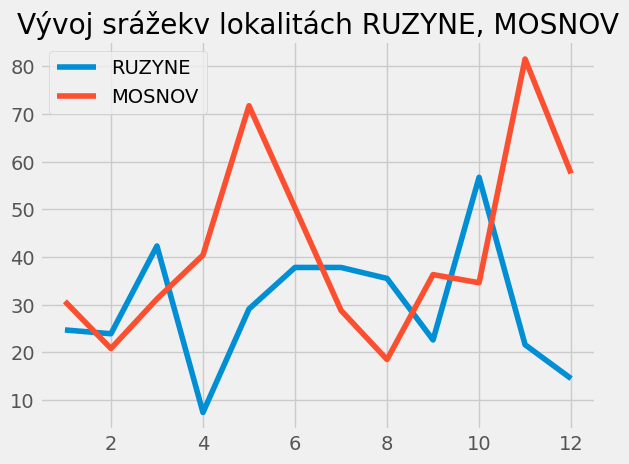

In [38]:
# 2. Uvod

import pandas as pd
from matplotlib import pyplot as plt
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Převeďte DATE na pd.datetime
2. Dopočítejte sloupec ROK, MESIC
3. Filtrujte data na ROK == 2000
4. Agregujte dle MESIC,NAME, kdy počítáme sum z PRCP
5. Vytvořte spojnicový graf o dvou osách zobrazující sumu PRCP v RUZYNE, MOSNOV
6. Zapněte legendu grafu
7. Nastavte titulek grafu: Vývoj srážek v lokalitách RUZYNE, MOSNOV

'''

df = pd.read_csv(url,sep=";")
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.assign(ROK=df["DATE"].dt.year,MESIC=df["DATE"].dt.month)

df = df.loc[df["ROK"]==2000]

df = df.groupby(by=["MESIC","NAME"],as_index=False)["PRCP"].sum()


fig, ax  = plt.subplots()


ax.plot(df.loc[df["NAME"]=="RUZYNE","MESIC"],df.loc[df["NAME"]=="RUZYNE","PRCP"],label="RUZYNE")
ax.plot(df.loc[df["NAME"]=="MOSNOV","MESIC"],df.loc[df["NAME"]=="MOSNOV","PRCP"],label="MOSNOV")
ax.set_title("Vývoj srážekv lokalitách RUZYNE, MOSNOV")
plt.legend()
plt.show()


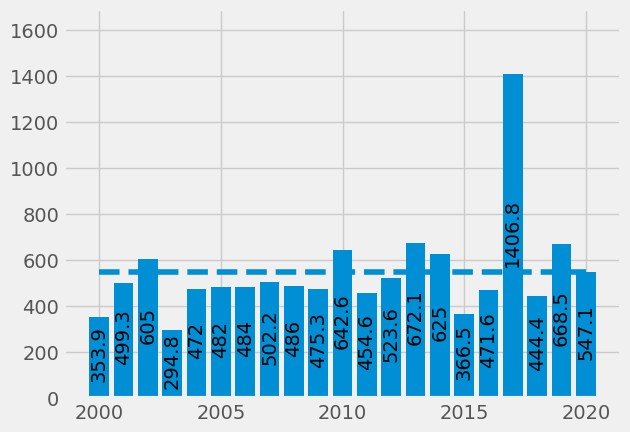

In [39]:
# 3. Uvod

import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Převeďte DATE na pd.datetime
2. Dopočítejte sloupec ROK
3. Filtrujte data na NAME == "RUZYNE"
4. Agregujte data, kdy počítáme sum z PRCP
5. Do proměnné prumerne_rocni_srazky si spočítejte průměrné roční srážky
6. Vytvořte kombinovaný graf:
	- sloupce: suma srážek po letech
	- čára: průměrné roční srážky

'''
from matplotlib import pyplot as plt
df = pd.read_csv(url,sep=";")
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.assign(ROK=df["DATE"].dt.year)
df = df.loc[df["NAME"]=="RUZYNE"]
df = df.groupby(by="ROK",as_index=False)["PRCP"].sum()

prumerne_rocni_srazky = df["PRCP"].mean()
df["prumerne_srazky"] = prumerne_rocni_srazky
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()

graf = ax.bar(df["ROK"],df["PRCP"])
ax.plot(df["ROK"],df["prumerne_srazky"],linestyle="dashed")

ax.bar_label(graf,padding=3,rotation=90,label_type="center")

ax.set_ylim((0,df["PRCP"].max()*1.2))

plt.show()


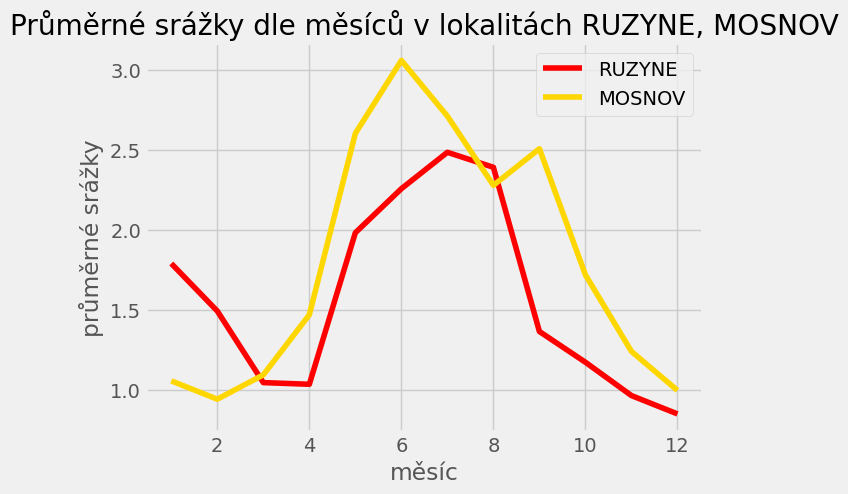

In [40]:
# 4. Formatovani a styly

import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Převeďte DATE na pd.datetime
2. Filtrujte na NAME je RUZYNE nebo MOSNOV
3. Dopočítejte sloupec MESIC
4. Agregujte data dle NAME,MESIC, kdy počítáme mean z PRCP
5. Vytvořte spojnicový graf s osami pro
	- průměrné srážky v RUZYNE (červená barva)
	- průměrné srážky v MOSNOV (zlatá barva)
6. Dosaďte název grafu: Průměrné srážky dle měsíců v lokalitách RUZYNE, MOSNOV
7. Názvy os:
	x: měsíc
	y: průměrné srážky
8. Vypněte mřížku
9. Zapněte legendu

'''

from matplotlib import pyplot as plt
df = pd.read_csv(url,sep=";")
df["DATE"] = pd.to_datetime(df["DATE"])

df["MESIC"] = df["DATE"].dt.month
df = df.loc[df["NAME"].isin(["RUZYNE","MOSNOV"])]
df = df.groupby(by=["NAME","MESIC"])["PRCP"].mean()

df = df.unstack(level=0)


fig, ax = plt.subplots()

ax.plot(df.index,df["RUZYNE"],color="red",label="RUZYNE")
ax.plot(df.index,df["MOSNOV"],color="gold",label="MOSNOV")
ax.set_xlabel("měsíc")
ax.set_ylabel("průměrné srážky")
ax.legend()
ax.set_title("Průměrné srážky dle měsíců v lokalitách RUZYNE, MOSNOV")
plt.show()





In [41]:
#5. Formatovani a styly

import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Převeďte DATE na pd.datetime
2. Filtrujte na NAME je RUZYNE
3. Dopočítejte sloupec MESIC
4. Agregujte data dle MESIC, kdy počítáme mean z PRCP
5. Dopočítejte si průměr z průměrných měsíčních srážek
6. Vizualizujte graf:
	- sloupce: průměrné srážky dle měsíců
		- barva sloupce: modrá, pokud jsou průměrné srážky v daném měsíci nad průměrnými měsíčními srážkami, jinak červená
	- spojnice: průměrné měsíční srážky (tj. průměr z průměrných měsíčních srážek)
		- typ spojnice: tečkovaná
		- barva spojnice: červená
		- průhlednost spojnice: 0.5
7. Formátování ax:
	- vypněte mřížku
	- zapněte legendu
'''




'\n1. Převeďte DATE na pd.datetime\n2. Filtrujte na NAME je RUZYNE\n3. Dopočítejte sloupec MESIC\n4. Agregujte data dle MESIC, kdy počítáme mean z PRCP\n5. Dopočítejte si průměr z průměrných měsíčních srážek\n6. Vizualizujte graf:\n\t- sloupce: průměrné srážky dle měsíců\n\t\t- barva sloupce: modrá, pokud jsou průměrné srážky v daném měsíci nad průměrnými měsíčními srážkami, jinak červená\n\t- spojnice: průměrné měsíční srážky (tj. průměr z průměrných měsíčních srážek)\n\t\t- typ spojnice: tečkovaná\n\t\t- barva spojnice: červená\n\t\t- průhlednost spojnice: 0.5\n7. Formátování ax:\n\t- vypněte mřížku\n\t- zapněte legendu\n'

In [42]:
#6. Pokročile struktury

import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
1. Vizualizujte fig se 3 řádky a 2 sloupci kdy:
	- první řádek:
		1. spojnicový graf zobrazující:
			denní PRCP v roce 2000 v RUZYNE
			klouzavý 7 denní průměr PRCP v roce 2000 v RUZYNE
		2. spojnicový graf zobrazující:
			denní TMAX v roce 2000 v RUZYNE
			klouzavý 7 denní průměr TMAX v roce 2000 v RUZYNE
	- druhý řádek:
		1. sloupcový graf zobrazující:
			průměrné PRCP v jednotlivých letech v RUZYNE, přičemž ROK 2000 má červenou barvu, ostatní roky modrou barvu
	- třetí řádek:
		1. sloupcový graf zobrazující:
			- průměrnou TMAX v jednotlivých letech v RUZYNE, přičemž rok  2000 má červenou barvu, ostatní roky modrou barvu

2. Každý graf bude mít svůj název
3. Jednotlivé grafy umístěte (odsaďte) tak, ať se nepřekrývají
4. Ani jeden graf nebude mít mřížku	
'''
	

'\n1. Vizualizujte fig se 3 řádky a 2 sloupci kdy:\n\t- první řádek:\n\t\t1. spojnicový graf zobrazující:\n\t\t\tdenní PRCP v roce 2000 v RUZYNE\n\t\t\tklouzavý 7 denní průměr PRCP v roce 2000 v RUZYNE\n\t\t2. spojnicový graf zobrazující:\n\t\t\tdenní TMAX v roce 2000 v RUZYNE\n\t\t\tklouzavý 7 denní průměr TMAX v roce 2000 v RUZYNE\n\t- druhý řádek:\n\t\t1. sloupcový graf zobrazující:\n\t\t\tprůměrné PRCP v jednotlivých letech v RUZYNE, přičemž ROK 2000 má červenou barvu, ostatní roky modrou barvu\n\t- třetí řádek:\n\t\t1. sloupcový graf zobrazující:\n\t\t\t- průměrnou TMAX v jednotlivých letech v RUZYNE, přičemž rok  2000 má červenou barvu, ostatní roky modrou barvu\n\n2. Každý graf bude mít svůj název\n3. Jednotlivé grafy umístěte (odsaďte) tak, ať se nepřekrývají\n4. Ani jeden graf nebude mít mřížku\t\n'